In [2]:
from subprocess import run

In [72]:
run(['/Users/arinafedotova/RiderProjects/Demographic/Exec/bin/Debug/net7.0/Exec', 
    '/Users/arinafedotova/Downloads/InitialAge.csv',
    '/Users/arinafedotova/Downloads/DeathRules.csv',
    '1970', '2000', '120000000'])

InitialAge
[0, 16],[2, 66],[6, 82],[11, 82],[16, 82],[21, 80],[26, 78],[31, 76],[36, 74],[41, 70],[46, 64],[51, 58],[56, 50],[61, 40],[66, 32],[71, 22],[76, 14],[81, 8],[91, 6]
Init Start
Number of People in the begining: 120000
Init End
Model Start
Year: 1971, Died: 10942, Born: 3414
Year: 1972, Died: 7895, Born: 4024
Year: 1973, Died: 6297, Born: 3911
Year: 1974, Died: 68, Born: 3671
Year: 1975, Died: 71, Born: 3145
Year: 1976, Died: 7139, Born: 3189
Year: 1977, Died: 5715, Born: 3778
Year: 1978, Died: 4899, Born: 3659
Year: 1979, Died: 65, Born: 3473
Year: 1980, Died: 130, Born: 3045
Year: 1981, Died: 5694, Born: 3105
Year: 1982, Died: 4809, Born: 3598
Year: 1983, Died: 4070, Born: 3449
Year: 1984, Died: 135, Born: 3345
Year: 1985, Died: 315, Born: 2910
Year: 1986, Died: 4811, Born: 3543
Year: 1987, Died: 4164, Born: 3374
Year: 1988, Died: 3547, Born: 3404
Year: 1989, Died: 313, Born: 3585
Year: 1990, Died: 570, Born: 3417
Year: 1991, Died: 4174, Born: 3688
Year: 1992, Died: 3730, B

CompletedProcess(args=['/Users/arinafedotova/RiderProjects/Demographic/Exec/bin/Debug/net7.0/Exec', '/Users/arinafedotova/Downloads/InitialAge.csv', '/Users/arinafedotova/Downloads/DeathRules.csv', '1970', '2000', '120000000'], returncode=0)

график изменения общего населения по годам в виде spline chart;  
график изменения населения мужского пола по годам в виде spline chart;  
график изменения населения женского пола по годам в виде spline chart;  
возрастной состав населения мужского пола на конец моделирования для возрастных категорий 0-18, 19-45, 45-65 и 65-100 лет в виде bar chart;  
возрастной состав населения женского пола на конец моделирования для возрастных категорий 0-18, 19-44, 45-65 и 66-100 лет в виде bar chart.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

In [64]:
fYearPop = pd.read_csv('YearPopulationFile.csv')

In [65]:
fYearPop.head()

,Year,Population,Men,Women
0,1970,120000,60000,60000
1,1971,112316,55564,56752
2,1972,108249,53105,55144
3,1973,105715,51488,54227
4,1974,109442,53153,56289


In [66]:
x = np.array(fYearPop['Year'])
y = np.array(fYearPop['Population'])
yM = np.array(fYearPop['Men'])
yF = np.array(fYearPop['Women'])

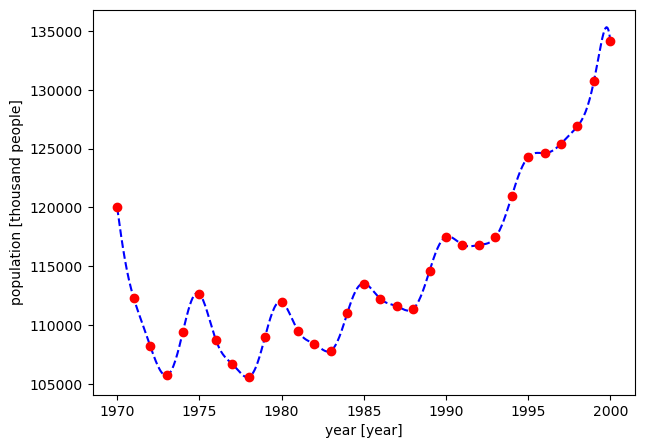

In [67]:
xnew = np.linspace(x.min(), x.max(), 500)
spl = make_interp_spline(x, y, k=7) 
ynew = spl(xnew)

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(xnew, ynew, '--', color='blue')

ax.plot(x, y, 'o', color='red')

plt.xlabel('year [year]')
plt.ylabel('population [thousand people]')
plt.show()

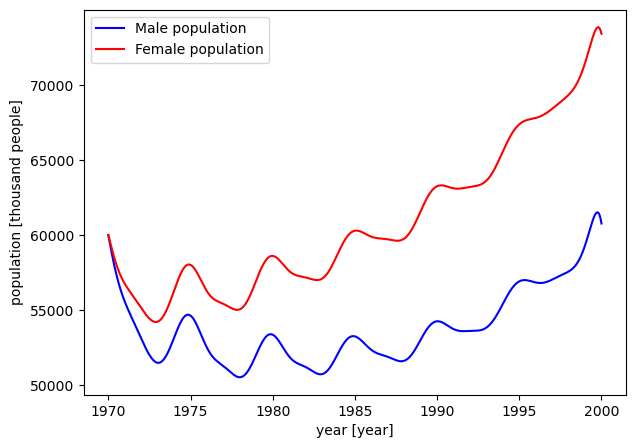

In [68]:
xnew = np.linspace(x.min(), x.max(), 500)
splM = make_interp_spline(x, yM, k=7) 
ynewM = splM(xnew)

splF = make_interp_spline(x, yF, k=7)  
ynewF = splF(xnew)

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(xnew, ynewM, color='blue', label='Male population')

ax.plot(xnew, ynewF, color='red', label='Female population')

plt.xlabel('year [year]')
plt.ylabel('population [thousand people]')
plt.legend()
plt.show()

In [69]:
fAgePop = pd.read_csv('AgePopulation.csv')
fAgePop.head()

,Age,Population,Men,Women
0,0-18,70958,31943,39015
1,19-44,51620,23506,28114
2,45-64,10723,4996,5727
3,65-100,858,318,540


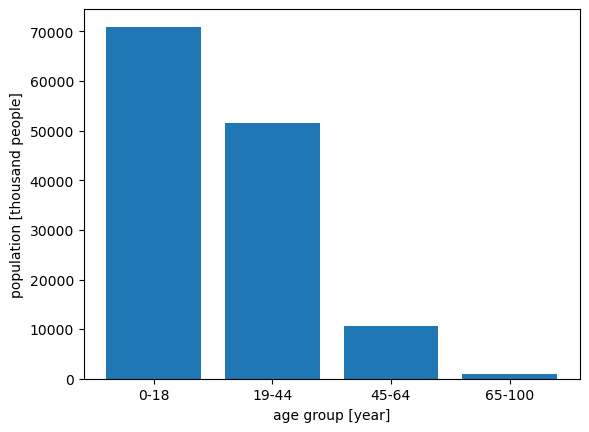

In [70]:
plt.bar(fAgePop["Age"], fAgePop["Population"])

plt.xlabel('age group [year]')
plt.ylabel('population [thousand people]')
plt.show()

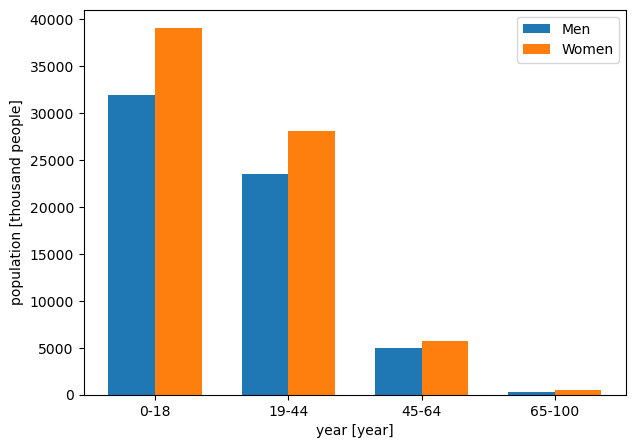

In [71]:
fig, ax = plt.subplots(figsize=(7, 5))
bar_width = 0.35
index = np.arange(len(fAgePop["Age"]))

ax.bar(index, fAgePop["Men"], bar_width, label='Men')

ax.bar(index+bar_width, fAgePop["Women"], bar_width, label='Women')

plt.xlabel('year [year]')
plt.ylabel('population [thousand people]')
plt.xticks(index + bar_width/2, fAgePop["Age"])
plt.legend()
plt.show()